# Higher-order FD schemes applied to the wave equation

u_t + c*u_x = 0

I.C:

 u(x,0) = sin(4pix); 0 <= x < 0.25
 u(x,0) = sin(4pi(x-0.25)); 0 <= x < 0.25
 u(x,0) = 0 ; 0.25<=x <= 1
 
B.C: Periodic

a. 601 temportal nodes & 51 spatial nodes

 i) using explicit 1st order forward time and 1st order backward space
 ii) using implicit 1st order backward time and 2nd order central space
 iii) plot solution at t =[0,2,4,6] and comment on the result
 
b. Repeat question a but using 201 temporal nodes and 101 spatial nodes comment regarding stability and CFL condition
 

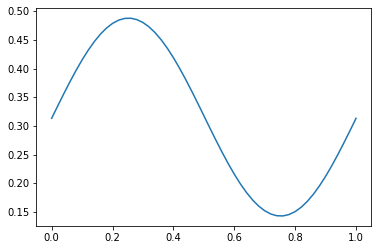

In [60]:
import numpy as np
import matplotlib.pyplot as plt
c = 0.5
L = 1
T = 6
Nx = 51
Nt = 601
x = np.linspace(0,L,Nx)
t = np.linspace(0,T,Nt)

dx = x[1] - x[0]
dt = t[1] - t[0]

C = c*dt/dx
u = np.zeros(Nx) 
un = np.zeros(Nx)
u[0:int(Nx*.25)] = np.sin(4*np.pi*x[0:int(Nx*.25)])
u[int((Nx+1)*.25):int(.5*Nx)]= np.sin(4*np.pi*(x[int((Nx+1)*.25):int(.5*Nx)]-0.25))
un = u.copy()

for n in range(0,Nt):
    un=u.copy()   
    u[1:] = un[1:]*(1-C)+C*u[0:-1] # this is weird... maybe because the b.c
    u[0] = u[-1]                #  is periodic the usual notationa for vecotorization
                                # did not work.
plt.plot(x,u)

